# Data Description

For this project together with the marketing team have compiled a list of hypotheses to help increase revenue. In this analysis, the projection is divided into two major parts.

There are several stages of the analysis this time, namely:
1. divide the data according to the project
2. Prioritize the Hypotheses for the first project
3. Analyze A/B Testing for the second part of the project


# Data Pre-processing

In [1]:
#load all libraries
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Part 1. Prioritizing Hypotheses

In [2]:
#Importing file into a DataFrame
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep = ";")

In [3]:
hypothesis.Hypothesis.unique()

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Effort']
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Effort']

In [6]:
#Implementing the ICE framework
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [7]:
#Implementing the RICE framework
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


It can be seen from the data above that the main priority for ICE is `Launch a promotion that gives users discounts on their birthdays` although the effort is not much, however, based on this study it is very possible to get the sales.
While for RICE results, `Add a subscription form to all the main pages. This will help you compile a mailing list` to be top priority, since it can reach people out who are not yet a user. Because the reach value is 10, it can double the RICE value.

# Part 2. A/B Testing Analysis

In [8]:
#Importing file into a DataFrame
orders = pd.read_csv('/datasets/orders_us.csv', sep = ",")
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/datasets/visits_us.csv', sep = ",")
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
#writing correction
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
#cumulative income by group
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date': 'max',
    'group': 'max',
    'transaction_id': pd.Series.nunique,
    'visitor_id': pd.Series.nunique,
    'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date': 'max',
    'group': 'max',
    'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits',]

cumulativeData.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [13]:
print(orders['date'].min())
print(orders['date'].max())
print(len(orders))

2019-08-01 00:00:00
2019-08-31 00:00:00
1197


## Cumulative income by group

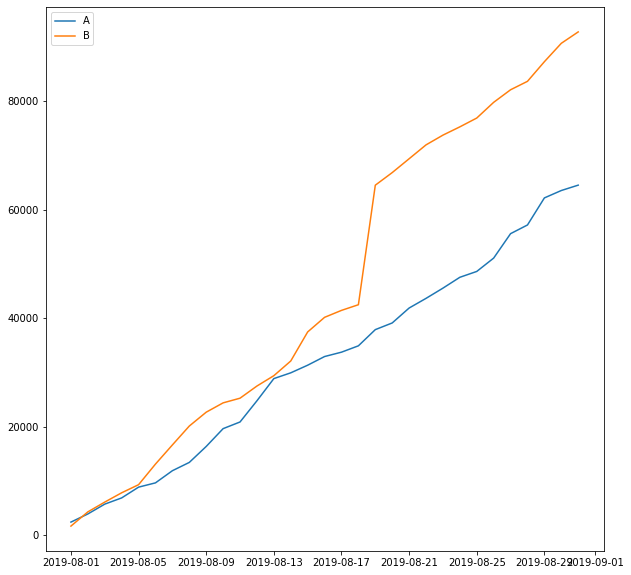

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

ax, fig = plt.subplots(figsize=(10, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()   

The chart shows that, the value of revenue per group per day will continue to increase. Graph B (test group) and Graph A (control group), at the beginning of the trend did not show a significant difference, but in the middle of August (18-20) there was a significant increase for the test group. It means, there may be outliers that cause this to happen.

## Cumulative average order size by group

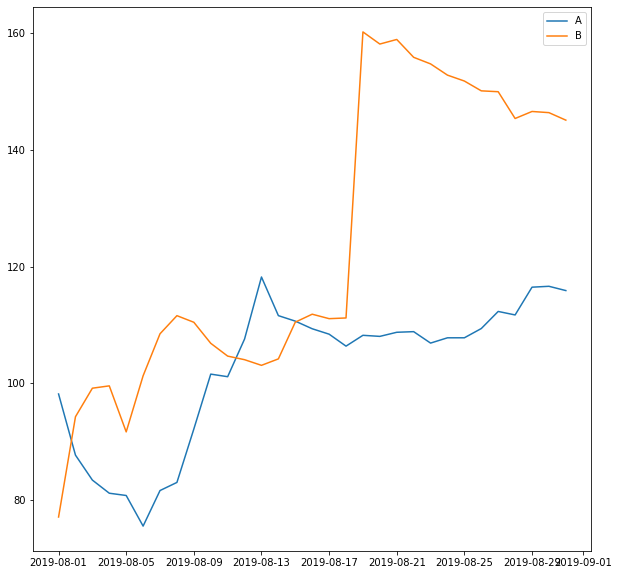

In [15]:
ax, fig = plt.subplots(figsize=(10, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()   

can be seen, the initial number of orders averaged around 100/order (group B), on the other hand group A slightly decreased (80/order) compared to group B. However, there was a striking difference for group B where there was a peak in the forecast August 17-19, most likely there will be orders where the number of orders has a very high revenue per order value which will make a very drastic increase.

## Relative differences to the cumulative average order size

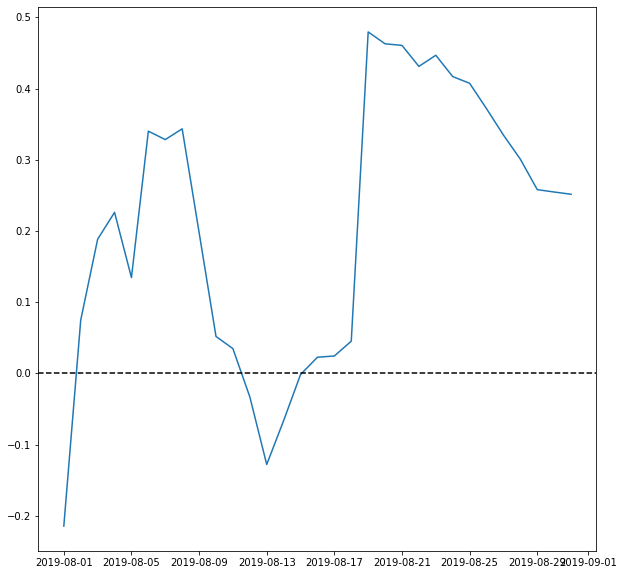

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

ax, fig = plt.subplots(figsize = (10, 10))
plt.plot(mergedCumulativeRevenue['date'],
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
        (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])- 1)
plt.axhline(y=0, color='black', linestyle='--')

At first, B's average orders were lower than A's, so that caused -20%. but after a long time there are changes, increases, then drops and rises again or fluctuation conditions occur. so that it cannot get a definite conclusion due to the trend of fluctuating.

## The conversion rate of each batch as the order ratio to the number of visits each day

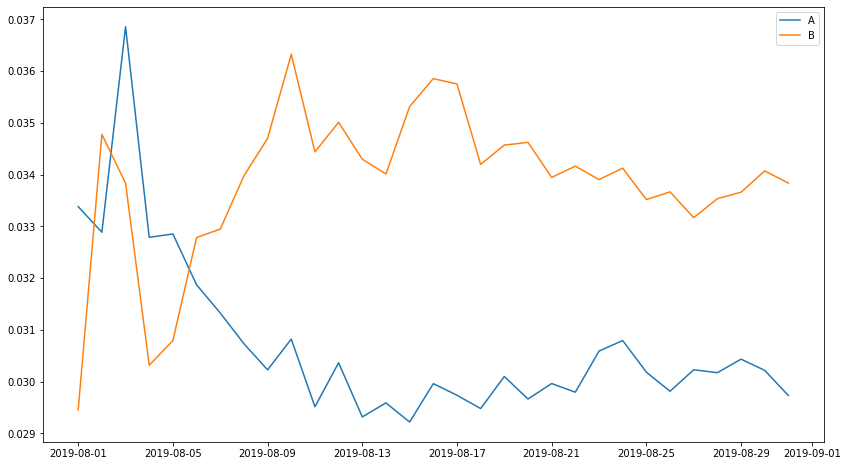

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
ax, fig = plt.subplots(figsize=(14, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()  

It can be seen that as for conversion, at the beginning group A was higher, but over time the convention of the control group decreased compared to group B.

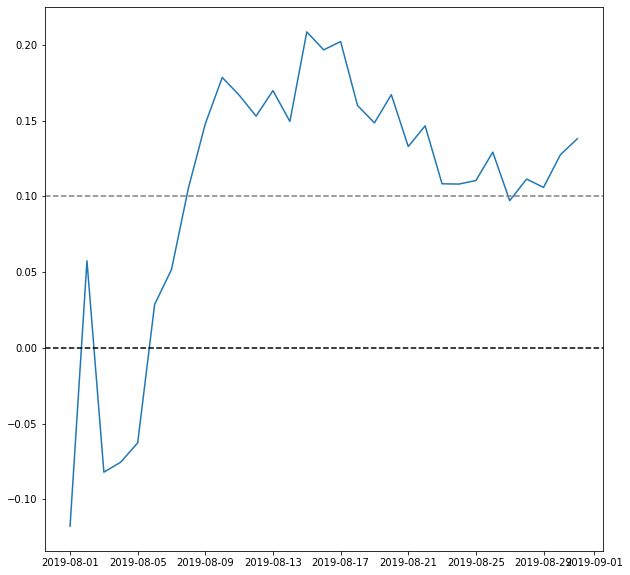

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

ax, fig = plt.subplots(figsize = (10, 10))
plt.plot(mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']- 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

It can be seen that for one month, at the beginning of the first week, there was a fluctuating trend. However, for the next 3 weeks it looks quite consistent (above 10%) for the relative difference. Which means the conversion of group B is 10% greater than that of group A.

## Scatter chart for the number of orders per user

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


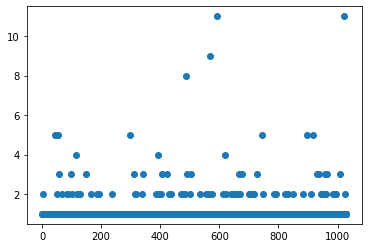

In [19]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Mostly people place as many as 4 orders and some people who place orders more than 4 are considered as outliers.

## 95th and 99th percentile for the number of orders per user

In [20]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])


90% of users place orders between 0-1 times. 95% of users order 1-2 times. 99% of users place orders 3-4 times.

## Scatter chart for order price

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  19920.4     B
1196      3936777065  2108080724 2019-08-15   3120.1     B
858        192721366  1316129916 2019-08-27   1450.2     A
1136       666610489  1307669133 2019-08-13   1425.8     A
744       3668308183   888512513 2019-08-27   1335.6     B
662       1811671147  4266935830 2019-08-29   1220.2     A
682       1216533772  4266935830 2019-08-29   1220.2     B
743       3603576309  4133034833 2019-08-09   1050.0     A
1103      1348774318  1164614297 2019-08-12   1025.8     A
1099       316924019   148427295 2019-08-12   1015.9     A


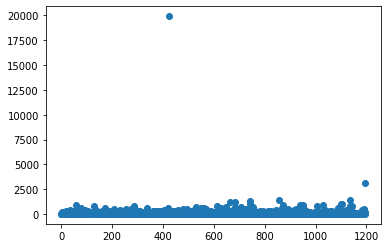

In [21]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

(0.0, 1210.0, 0.0, 1500.0)

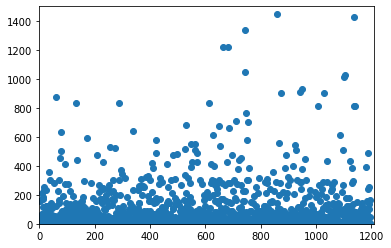

In [22]:
#zoom in
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1210, 0, 1500])

Seen only up to 1400$ for the maximum purchase price.

## 95th and 99th percentile for order price

In [23]:
np.percentile(orders['revenue'], [90, 95, 99])

array([282.48 , 435.54 , 900.904])

95% of users make purchases between 0 - 435 dollar while for those who make purchases above 435 dollar only 5% of the user base.

## Statistical significance of conversion differences between groups (raw data)

In [24]:
import scipy.stats as stats

In [25]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visits'].sum()-
                                                   len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visits'].sum()-
                                                   len(ordersByUsersB['orders'])), name='orders')], axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))      

0.01679
0.138


The hypothesis are:
- H0 = the conversion between the test group is different from the control group
- H1 = the conversion between the test group is the same as the control group
- alpha= 0.05

The conversion of group B was 13.8% higher than group A. The test results showed a p-value (0.016), which means that the p-value is less than the alpha value.

which means we can reject the hypothesis H0.

## Statistical significance of differences in mean order size between groups (raw data)

In [26]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                                          orders[orders['group'] == 'B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.692
0.252


Even though there is a relatively large difference, the deverse is statistically significant, but statistically it cannot be believed that order size B is greater than A. Because the p-value is large, H0 cannot be rejected.

## Statistical significance of conversion differences between groups (filtered data)

In [27]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
    ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 435]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


In [29]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(visitors[visitors['group'] == 'A']['visits'].sum() - 
                                                         len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(visitors[visitors['group'] == 'B']['visits'].sum() - 
                                                         len(ordersByUsersB['orders'])), name='orders')], axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.01418
0.171


We see the difference in conversions increasing by 17% with even lower P-values. It can be ensured that the conversion of group B is higher than that of group A, if the outliers are removed.

## Statistical significance of differences in mean order size between groups (filtered data)

In [34]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() / 
        orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()- 1))


0.750
-0.027


The hypothesis are:
- H0= average order B is the same as average order A
- H1= average order B is different from average order A
- alpha= 0.05

however, the average order B turns out to be lower than the average order A. That is, the changes obtained will cause the average purchase value to decrease slightly compared to A.
On the other hand, statistical testing says that the p_value is above 0.05, which means we cannot reject H0.

## Decision

These are some points from the final project:
1. There were statistically significant differences in conversion between groups, based on both raw and filtered data.

2. The raw data initially showed no statistically significant differences between groups in mean purchase size. However, once the anomaly was removed, it turned out that the difference was statistically significant.

3. The graph of conversion differences between groups shows that the results of group B are better than group A: the results of group B tend to increase or stabilize close to the average value.

Hence, stop testing and consider Group B scored higher on both metrics, and the difference was statistically significant. In addition, the conversion chart also shows that the results are quite stable.